In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


In [3]:
# b. Load the training and testing data (CIFAR-10)
# Load dataset from Keras (automatically downloads if not present)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten labels (convert to categorical for 10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 144s 1us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [4]:
# Define the network architecture using Keras
# Define a Feedforward Neural Network (no Conv2D)
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),   # Flatten images to 1D vector
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')     # Output layer for 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train the model using SGD
# Compile the model
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    shuffle=True
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2015 - loss: 2.1543 - val_accuracy: 0.3412 - val_loss: 1.8580
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.3203 - loss: 1.8830 - val_accuracy: 0.3622 - val_loss: 1.7704
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.3522 - loss: 1.7974 - val_accuracy: 0.3917 - val_loss: 1.7030
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.3739 - loss: 1.7404 - val_accuracy: 0.4126 - val_loss: 1.6531
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3875 - loss: 1.7082 - val_accuracy: 0.4146 - val_loss: 1.6474
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3987 - loss: 1.6794 - val_accuracy: 0.4039 - val_loss: 1.6791
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4085 - loss: 1.6567 - val_accuracy: 0.4465 - val_loss: 1.5569
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4207 - loss: 1.6193 - 

In [7]:
# Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 - 1s - 5ms/step - accuracy: 0.4347 - loss: 1.5676

Test Accuracy: 0.43470001220703125
Test Loss: 1.5676164627075195


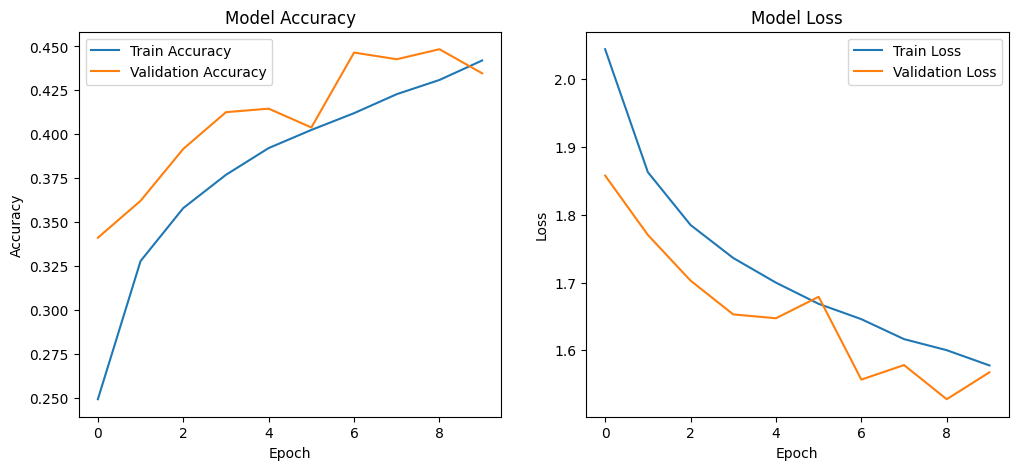

In [8]:
# Plot the training loss and accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()